In [13]:
import pandas as pd

dados = pd.read_csv('./manutencao_preditiva.csv')
dados

,UDI,ID Produto,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo,Tipo da Falha
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [14]:
dados['Tipo'].value_counts()

L    6000
M    2997
H    1003
Name: Tipo, dtype: int64

In [15]:
dados['Tipo da Falha'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Tipo da Falha, dtype: int64

In [16]:
dados['ID Produto'].value_counts()

M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: ID Produto, Length: 10000, dtype: int64

## Ex.1 - Uso de função lamda e apply

In [17]:

df = pd.DataFrame({
    'A':[1, 2, 3, 4, 5],
    'B':[10, 20, 30, 40, 50],
    'C':[100, 200, 300, 400, 500],
})

df['A_dobro'] = df['A'].apply(lambda z: z*2)

df

,A,B,C,A_dobro
0,1,10,100,2
1,2,20,200,4
2,3,30,300,6
3,4,40,400,8
4,5,50,500,10


### Ex. 2 !! - AXIS dentro do lambda com DF

In [18]:
df['soma_colunas'] = df.apply(lambda x: x['A'] + x['B'] + x['C'], axis=1)
df

,A,B,C,A_dobro,soma_colunas
0,1,10,100,2,111
1,2,20,200,4,222
2,3,30,300,6,333
3,4,40,400,8,444
4,5,50,500,10,555


## Ex. 3

In [19]:
import numpy as np

def calcular_media(linha):
    media = np.mean([linha['A'], linha['B'], linha['C']])
    return media

df['media_colunas'] = df.apply(calcular_media, axis = 1)
df

,A,B,C,A_dobro,soma_colunas,media_colunas
0,1,10,100,2,111,37.0
1,2,20,200,4,222,74.0
2,3,30,300,6,333,111.0
3,4,40,400,8,444,148.0
4,5,50,500,10,555,185.0


## Ex. 4

In [20]:
df['categorica'] = df['A'].apply(lambda x: 'Alto' if x > 3 else 'Baixo')

df

,A,B,C,A_dobro,soma_colunas,media_colunas,categorica
0,1,10,100,2,111,37.0,Baixo
1,2,20,200,4,222,74.0,Baixo
2,3,30,300,6,333,111.0,Baixo
3,4,40,400,8,444,148.0,Alto
4,5,50,500,10,555,185.0,Alto


## Exercicio

Normalize as três colunas A, B e C usando a ideia de Min-Max

X_normalizado = (X - Xmin) / (Xmax - Xmin)

In [32]:

df['A_normalizado'] = df['A'].apply(lambda x: (x - min(df['A'])) / (max(df['A']) - min(df['A'])))
df

,A,B,C,A_dobro,soma_colunas,media_colunas,categorica,A_normalizado
0,1,10,100,2,111,37.0,Baixo,0.00
1,2,20,200,4,222,74.0,Baixo,0.25
2,3,30,300,6,333,111.0,Baixo,0.50
3,4,40,400,8,444,148.0,Alto,0.75
4,5,50,500,10,555,185.0,Alto,1.00


In [42]:
dados['Temp Ar Normalizado'] = dados['Temperatura Ar [K]'].apply(lambda x: (x - min(dados['Temperatura Ar [K]'])) / (max(dados['Temperatura Ar [K]']) - min(dados['Temperatura Ar [K]'])))
dados['Temp Processo Normalizado'] = dados['Temperatura Processo [K]'].apply(lambda x: (x - min(dados['Temperatura Processo [K]'])) / (max(dados['Temperatura Processo [K]']) - min(dados['Temperatura Processo [K]'])))
dados

,UDI,ID Produto,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo,Tipo da Falha,Temp Ar Normalizado,Temp Processo Normalizado
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,0.304348,0.358025
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,0.315217,0.370370
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,0.304348,0.345679
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,0.315217,0.358025
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,0.315217,0.370370
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,0.380435,0.333333
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,0.391304,0.333333
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,0.402174,0.358025
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,0.402174,0.370370


In [43]:
df[['A_norm', 'B_norm']] = (df[['A','B']] - df[['A','B']].min()) / (df[['A','B']].max() - df[['A','B']].min()) 
df

,A,B,C,A_dobro,soma_colunas,media_colunas,categorica,A_normalizado,A_norm,B_norm
0,1,10,100,2,111,37.0,Baixo,0.00,0.00,0.00
1,2,20,200,4,222,74.0,Baixo,0.25,0.25,0.25
2,3,30,300,6,333,111.0,Baixo,0.50,0.50,0.50
3,4,40,400,8,444,148.0,Alto,0.75,0.75,0.75
4,5,50,500,10,555,185.0,Alto,1.00,1.00,1.00


In [46]:
dados[['Temp Ar Normalizado', 'Temp Processo Normalizado']] = (dados[['Temperatura Ar [K]','Temperatura Processo [K]']] - dados[['Temperatura Ar [K]','Temperatura Processo [K]']].min()) / (dados[['Temperatura Ar [K]','Temperatura Processo [K]']].max() - dados[['Temperatura Ar [K]','Temperatura Processo [K]']].min())
dados

,UDI,ID Produto,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo,Tipo da Falha,Temp Ar Normalizado,Temp Processo Normalizado
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,0.304348,0.358025
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,0.315217,0.370370
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,0.304348,0.345679
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,0.315217,0.358025
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,0.315217,0.370370
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,0.380435,0.333333
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,0.391304,0.333333
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,0.402174,0.358025
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,0.402174,0.370370


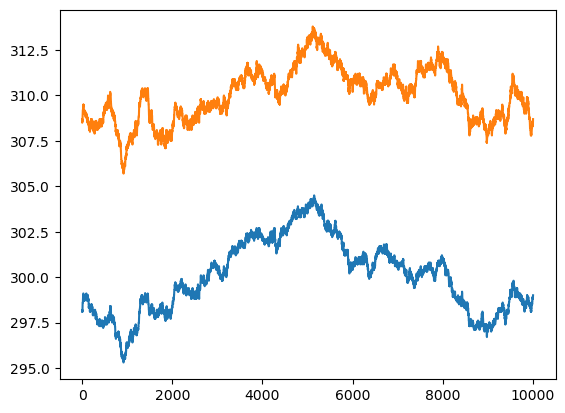

In [48]:
from matplotlib import pyplot as plt 

x = dados['UDI']
y1 = dados['Temperatura Ar [K]']
y2 = dados['Temperatura Processo [K]']

plt.plot(x, y1, x, y2)
plt.show()

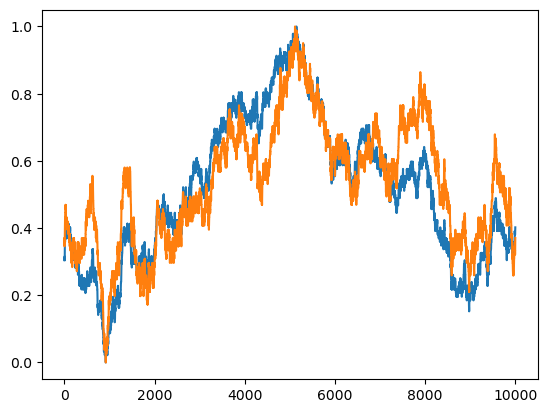

In [49]:
x = dados['UDI']
y1 = dados['Temp Ar Normalizado']
y2 = dados['Temp Processo Normalizado']

plt.plot(x, y1, x, y2)
plt.show()

In [ ]:
def normalizar(tabela=pd.DataFrame, coluna_inicial=int, coluna_final=int):
    colunas = tabela.columns
    for col in colunas[coluna_inicial:coluna_final]:
        tabela[col]


'ID Produto'

## Transformar colunas nao numericas

In [52]:
df2 = pd.DataFrame({
    'Nome':['Ana','Laura','Pedro','José'],
    'Cidade':['SP','RJ','SP','CE'],
    'Sexo':['F','F','M','M']
})

df2

,Nome,Cidade,Sexo
0,Ana,SP,F
1,Laura,RJ,F
2,Pedro,SP,M
3,José,CE,M


In [55]:
df2['nome_num'] = df2['Nome'].map({'Ana': 0, 'Laura': 1, 'Pedro': 2, 'José':3 })

df2

,Nome,Cidade,Sexo,nome_num
0,Ana,SP,F,0
1,Laura,RJ,F,1
2,Pedro,SP,M,2
3,José,CE,M,3
